## <u>Maritime Shipping Industry Data Analysis and Prediction</u>
### Chow Tsz Chun Samuel
### Phuc Thien Bao Nguyen, Peter
<br>

## Phase 2 - Objective(s)
- ### Use separate coding file for 53451, 534546 and 549305 Dataset
- ### Data Preparation for Time Series Data
- ### Perform Standardization To the Data
- ### Apply different feature selection thresold to the dataset on differnt models
- ### (1) Use All Features to Test the Result on following Models under default configuration
    - #### Linear Regression
    - #### Lasso Regression
    - #### Ridge Regression
    - #### Decision Tree Regression (DTR)
    - #### Random Forest (RF)
    - #### Support Vector Regression (SVR)
    - #### Extreme Gradient Bossting (XGBoost)
    - #### Multilayer Perceptron (MLP)
- ### (2) Apply Grid Search To find the best configuration on each Model
    - #### Recalculate the accuracy 

In [2]:
!pip install pandas
!pip install matplotlib
!pip install numpy
!python -m pip install --upgrade pip
!pip install ipywidgets
!pip install xgboost

Python was not found; run without arguments to install from the Microsoft Store, or disable this shortcut from Settings > Manage App Execution Aliases.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Markdown, display

## <font color='green'>This Code works on the (534541) Dataset

## (A) Manual Data Preparation (534541 dataset)
### - Remove the Data Column
### - Shift the Result of 534541 by ONE Row
### - Remove the LAST ROW of Other Features 
### - then here import the modified csv file as dataframe

In [6]:
dataset_name = '534541'
dataset_name_with_date = f"{dataset_name}_with_date"
dataset_file_name = f"dataset/{dataset_name}_shifted.csv"

In [7]:
dataset = {
    dataset_name_with_date : pd.read_csv(dataset_file_name)
}

In [8]:
df_group = {
    dataset_name : dataset[dataset_name_with_date].drop(['date'], axis=1)
}

In [9]:
df_group[dataset_name]

,534541,47027,30213,59288,14392,19597,45086,12437,540732,46204,...,548450,19671,22807,548454,546255,22828,547449,10509791,545629,10952
0,19071.06000,12.730000,267.48089,38.741176,5.6875,25.40350,11289652,1.67583,14.27507,2820468,...,129748.8300,111.50,1786.0,272149.9400,699.47,439.0,104.67000,16.48,13.08,8.00623
1,22223.94000,12.730000,268.98981,39.264706,5.9375,27.63300,12156890,1.70175,14.25326,1330213,...,122607.6100,113.25,1750.0,261656.6100,699.47,431.0,100.72000,16.17,14.66,8.20910
2,23177.78000,13.500000,269.42904,39.264706,6.0000,27.59560,11801976,1.71406,14.28514,2554922,...,130197.7100,112.40,1895.0,277396.6000,699.47,434.0,100.72000,15.86,11.27,8.38826
3,20849.68000,13.500000,270.42378,39.264706,6.0000,22.84500,11984532,1.70810,14.28443,1712977,...,125894.4600,112.00,1792.0,270838.2700,698.78,445.0,99.14000,15.47,12.86,8.66177
4,20029.62000,12.470000,271.39603,39.788235,6.0000,27.33750,11477215,1.72843,14.32377,1055913,...,133052.8800,116.50,1679.0,278708.2700,698.78,476.0,99.14000,15.49,11.43,9.11050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,16168.10000,21.477273,982.28829,61.750000,4.2500,83.28222,22027906,1.33008,11.70630,3823384,...,155891.7143,377.25,7070.0,195312.7143,1011.00,4062.0,91.54163,13.85,38.44,10.48568
280,13682.27273,20.454545,985.20054,63.000000,4.4375,75.69478,20403118,1.33957,11.73972,4753750,...,172491.4286,367.75,7093.0,203099.1429,992.00,4252.0,89.50135,12.00,35.73,10.82323
281,12900.00000,18.409091,987.60788,63.500000,4.7000,74.97864,20267384,1.34540,11.77609,6995849,...,178820.4286,343.00,6882.0,198758.8571,1000.00,4136.0,89.17437,10.37,29.60,10.78208
282,12136.81818,18.920455,990.18845,63.500000,5.0000,80.16000,21505070,1.33302,11.80680,3366989,...,191656.0000,346.75,6903.0,204858.0000,994.00,4128.0,89.53052,10.09,29.14,10.24245


## (B) Data Wrangling
<br>

### <b>(B1) <u>Data validation</u></b>
### The very first step after extraction is verifying the data on checking if included invalid value
### The dataset is clear without any NULL value

In [11]:
df_group[dataset_name].isnull().sum()

534541      0
47027       0
30213       0
59288       0
14392       0
19597       0
45086       0
12437       0
540732      0
46204       0
534435      0
10722376    0
541454      0
22788       0
548430      0
22555       0
11279191    0
22539       0
38498       0
22768       0
548450      0
19671       0
22807       0
548454      0
546255      0
22828       0
547449      0
10509791    0
545629      0
10952       0
dtype: int64

In [12]:
correlation = df_group[dataset_name].corr().round(2)

target = "534541"
thresholds = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
features_group_size = len(thresholds)
df_featureSelected = []

target_correlation = correlation[target]

for i in range(features_group_size):
    features_above_threshold = target_correlation[abs(target_correlation) >= thresholds[i]].index.tolist()

    # Remove the target itself from the list
    features_above_threshold.remove(target)

    df_featureSelected.append(df_group[dataset_name].filter(items=features_above_threshold))

    display(df_featureSelected[-1])

,47027,30213,59288,14392,19597,45086,12437,540732,46204,534435,...,548450,19671,22807,548454,546255,22828,547449,10509791,545629,10952
0,12.730000,267.48089,38.741176,5.6875,25.40350,11289652,1.67583,14.27507,2820468,1.134,...,129748.8300,111.50,1786.0,272149.9400,699.47,439.0,104.67000,16.48,13.08,8.00623
1,12.730000,268.98981,39.264706,5.9375,27.63300,12156890,1.70175,14.25326,1330213,1.444,...,122607.6100,113.25,1750.0,261656.6100,699.47,431.0,100.72000,16.17,14.66,8.20910
2,13.500000,269.42904,39.264706,6.0000,27.59560,11801976,1.71406,14.28514,2554922,1.612,...,130197.7100,112.40,1895.0,277396.6000,699.47,434.0,100.72000,15.86,11.27,8.38826
3,13.500000,270.42378,39.264706,6.0000,22.84500,11984532,1.70810,14.28443,1712977,1.761,...,125894.4600,112.00,1792.0,270838.2700,698.78,445.0,99.14000,15.47,12.86,8.66177
4,12.470000,271.39603,39.788235,6.0000,27.33750,11477215,1.72843,14.32377,1055913,2.150,...,133052.8800,116.50,1679.0,278708.2700,698.78,476.0,99.14000,15.49,11.43,9.11050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,21.477273,982.28829,61.750000,4.2500,83.28222,22027906,1.33008,11.70630,3823384,2.941,...,155891.7143,377.25,7070.0,195312.7143,1011.00,4062.0,91.54163,13.85,38.44,10.48568
280,20.454545,985.20054,63.000000,4.4375,75.69478,20403118,1.33957,11.73972,4753750,3.030,...,172491.4286,367.75,7093.0,203099.1429,992.00,4252.0,89.50135,12.00,35.73,10.82323
281,18.409091,987.60788,63.500000,4.7000,74.97864,20267384,1.34540,11.77609,6995849,3.044,...,178820.4286,343.00,6882.0,198758.8571,1000.00,4136.0,89.17437,10.37,29.60,10.78208
282,18.920455,990.18845,63.500000,5.0000,80.16000,21505070,1.33302,11.80680,3366989,3.068,...,191656.0000,346.75,6903.0,204858.0000,994.00,4128.0,89.53052,10.09,29.14,10.24245


,47027,30213,59288,14392,45086,12437,540732,46204,10722376,541454,...,22768,548450,22807,548454,546255,22828,547449,10509791,545629,10952
0,12.730000,267.48089,38.741176,5.6875,11289652,1.67583,14.27507,2820468,15.74,4.5600,...,961.000,129748.8300,1786.0,272149.9400,699.47,439.0,104.67000,16.48,13.08,8.00623
1,12.730000,268.98981,39.264706,5.9375,12156890,1.70175,14.25326,1330213,15.75,4.5600,...,950.000,122607.6100,1750.0,261656.6100,699.47,431.0,100.72000,16.17,14.66,8.20910
2,13.500000,269.42904,39.264706,6.0000,11801976,1.71406,14.28514,2554922,15.78,4.5600,...,1020.000,130197.7100,1895.0,277396.6000,699.47,434.0,100.72000,15.86,11.27,8.38826
3,13.500000,270.42378,39.264706,6.0000,11984532,1.70810,14.28443,1712977,15.77,4.5600,...,958.000,125894.4600,1792.0,270838.2700,698.78,445.0,99.14000,15.47,12.86,8.66177
4,12.470000,271.39603,39.788235,6.0000,11477215,1.72843,14.32377,1055913,15.77,4.6000,...,915.000,133052.8800,1679.0,278708.2700,698.78,476.0,99.14000,15.49,11.43,9.11050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,21.477273,982.28829,61.750000,4.2500,22027906,1.33008,11.70630,3823384,15.87,11.8875,...,258.216,155891.7143,7070.0,195312.7143,1011.00,4062.0,91.54163,13.85,38.44,10.48568
280,20.454545,985.20054,63.000000,4.4375,20403118,1.33957,11.73972,4753750,18.00,10.2000,...,310.039,172491.4286,7093.0,203099.1429,992.00,4252.0,89.50135,12.00,35.73,10.82323
281,18.409091,987.60788,63.500000,4.7000,20267384,1.34540,11.77609,6995849,16.55,11.1000,...,326.824,178820.4286,6882.0,198758.8571,1000.00,4136.0,89.17437,10.37,29.60,10.78208
282,18.920455,990.18845,63.500000,5.0000,21505070,1.33302,11.80680,3366989,17.93,11.1500,...,312.935,191656.0000,6903.0,204858.0000,994.00,4128.0,89.53052,10.09,29.14,10.24245


,47027,30213,59288,14392,45086,12437,540732,46204,10722376,22788,22555,22539,38498,22768,22807,548454,547449,10509791,545629,10952
0,12.730000,267.48089,38.741176,5.6875,11289652,1.67583,14.27507,2820468,15.74,1900.00,4448.84807,100.00000,103.45742,961.000,1786.0,272149.9400,104.67000,16.48,13.08,8.00623
1,12.730000,268.98981,39.264706,5.9375,12156890,1.70175,14.25326,1330213,15.75,1890.00,4468.03983,97.35228,105.10912,950.000,1750.0,261656.6100,100.72000,16.17,14.66,8.20910
2,13.500000,269.42904,39.264706,6.0000,11801976,1.71406,14.28514,2554922,15.78,2091.00,4484.25294,95.25874,105.73986,1020.000,1895.0,277396.6000,100.72000,15.86,11.27,8.38826
3,13.500000,270.42378,39.264706,6.0000,11984532,1.70810,14.28443,1712977,15.77,2029.00,4506.54207,92.77604,103.99441,958.000,1792.0,270838.2700,99.14000,15.47,12.86,8.66177
4,12.470000,271.39603,39.788235,6.0000,11477215,1.72843,14.32377,1055913,15.77,2079.00,4575.66570,88.58156,105.91260,915.000,1679.0,278708.2700,99.14000,15.49,11.43,9.11050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,21.477273,982.28829,61.750000,4.2500,22027906,1.33008,11.70630,3823384,15.87,544.30,4303.49538,108.25842,180.86651,258.216,7070.0,195312.7143,91.54163,13.85,38.44,10.48568
280,20.454545,985.20054,63.000000,4.4375,20403118,1.33957,11.73972,4753750,18.00,603.40,4313.11221,106.98998,183.92033,310.039,7093.0,203099.1429,89.50135,12.00,35.73,10.82323
281,18.409091,987.60788,63.500000,4.7000,20267384,1.34540,11.77609,6995849,16.55,485.70,4354.64268,107.00623,184.35019,326.824,6882.0,198758.8571,89.17437,10.37,29.60,10.78208
282,18.920455,990.18845,63.500000,5.0000,21505070,1.33302,11.80680,3366989,17.93,538.00,4383.62290,108.88648,184.76796,312.935,6903.0,204858.0000,89.53052,10.09,29.14,10.24245


,47027,30213,59288,14392,540732,46204,10722376,22788,22555,22539,38498,22768,22807,548454,10509791,545629,10952
0,12.730000,267.48089,38.741176,5.6875,14.27507,2820468,15.74,1900.00,4448.84807,100.00000,103.45742,961.000,1786.0,272149.9400,16.48,13.08,8.00623
1,12.730000,268.98981,39.264706,5.9375,14.25326,1330213,15.75,1890.00,4468.03983,97.35228,105.10912,950.000,1750.0,261656.6100,16.17,14.66,8.20910
2,13.500000,269.42904,39.264706,6.0000,14.28514,2554922,15.78,2091.00,4484.25294,95.25874,105.73986,1020.000,1895.0,277396.6000,15.86,11.27,8.38826
3,13.500000,270.42378,39.264706,6.0000,14.28443,1712977,15.77,2029.00,4506.54207,92.77604,103.99441,958.000,1792.0,270838.2700,15.47,12.86,8.66177
4,12.470000,271.39603,39.788235,6.0000,14.32377,1055913,15.77,2079.00,4575.66570,88.58156,105.91260,915.000,1679.0,278708.2700,15.49,11.43,9.11050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,21.477273,982.28829,61.750000,4.2500,11.70630,3823384,15.87,544.30,4303.49538,108.25842,180.86651,258.216,7070.0,195312.7143,13.85,38.44,10.48568
280,20.454545,985.20054,63.000000,4.4375,11.73972,4753750,18.00,603.40,4313.11221,106.98998,183.92033,310.039,7093.0,203099.1429,12.00,35.73,10.82323
281,18.409091,987.60788,63.500000,4.7000,11.77609,6995849,16.55,485.70,4354.64268,107.00623,184.35019,326.824,6882.0,198758.8571,10.37,29.60,10.78208
282,18.920455,990.18845,63.500000,5.0000,11.80680,3366989,17.93,538.00,4383.62290,108.88648,184.76796,312.935,6903.0,204858.0000,10.09,29.14,10.24245


,47027,30213,59288,14392,540732,46204,22788,22539,38498,22768,22807,548454,10509791,10952
0,12.730000,267.48089,38.741176,5.6875,14.27507,2820468,1900.00,100.00000,103.45742,961.000,1786.0,272149.9400,16.48,8.00623
1,12.730000,268.98981,39.264706,5.9375,14.25326,1330213,1890.00,97.35228,105.10912,950.000,1750.0,261656.6100,16.17,8.20910
2,13.500000,269.42904,39.264706,6.0000,14.28514,2554922,2091.00,95.25874,105.73986,1020.000,1895.0,277396.6000,15.86,8.38826
3,13.500000,270.42378,39.264706,6.0000,14.28443,1712977,2029.00,92.77604,103.99441,958.000,1792.0,270838.2700,15.47,8.66177
4,12.470000,271.39603,39.788235,6.0000,14.32377,1055913,2079.00,88.58156,105.91260,915.000,1679.0,278708.2700,15.49,9.11050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,21.477273,982.28829,61.750000,4.2500,11.70630,3823384,544.30,108.25842,180.86651,258.216,7070.0,195312.7143,13.85,10.48568
280,20.454545,985.20054,63.000000,4.4375,11.73972,4753750,603.40,106.98998,183.92033,310.039,7093.0,203099.1429,12.00,10.82323
281,18.409091,987.60788,63.500000,4.7000,11.77609,6995849,485.70,107.00623,184.35019,326.824,6882.0,198758.8571,10.37,10.78208
282,18.920455,990.18845,63.500000,5.0000,11.80680,3366989,538.00,108.88648,184.76796,312.935,6903.0,204858.0000,10.09,10.24245


,47027,59288,14392,540732,46204,22788,38498,548454,10509791
0,12.730000,38.741176,5.6875,14.27507,2820468,1900.00,103.45742,272149.9400,16.48
1,12.730000,39.264706,5.9375,14.25326,1330213,1890.00,105.10912,261656.6100,16.17
2,13.500000,39.264706,6.0000,14.28514,2554922,2091.00,105.73986,277396.6000,15.86
3,13.500000,39.264706,6.0000,14.28443,1712977,2029.00,103.99441,270838.2700,15.47
4,12.470000,39.788235,6.0000,14.32377,1055913,2079.00,105.91260,278708.2700,15.49
...,...,...,...,...,...,...,...,...,...
279,21.477273,61.750000,4.2500,11.70630,3823384,544.30,180.86651,195312.7143,13.85
280,20.454545,63.000000,4.4375,11.73972,4753750,603.40,183.92033,203099.1429,12.00
281,18.409091,63.500000,4.7000,11.77609,6995849,485.70,184.35019,198758.8571,10.37
282,18.920455,63.500000,5.0000,11.80680,3366989,538.00,184.76796,204858.0000,10.09


,47027,59288,10509791
0,12.730000,38.741176,16.48
1,12.730000,39.264706,16.17
2,13.500000,39.264706,15.86
3,13.500000,39.264706,15.47
4,12.470000,39.788235,15.49
...,...,...,...
279,21.477273,61.750000,13.85
280,20.454545,63.000000,12.00
281,18.409091,63.500000,10.37
282,18.920455,63.500000,10.09


,47027,59288
0,12.730000,38.741176
1,12.730000,39.264706
2,13.500000,39.264706
3,13.500000,39.264706
4,12.470000,39.788235
...,...,...
279,21.477273,61.750000
280,20.454545,63.000000
281,18.409091,63.500000
282,18.920455,63.500000


,47027
0,12.730000
1,12.730000
2,13.500000
3,13.500000
4,12.470000
...,...
279,21.477273
280,20.454545
281,18.409091
282,18.920455


### <b>(B2) <u>Split X Features and y result</u></b>

In [14]:
# A list of different features selected input
Xs = df_featureSelected #df_group[dataset_name].iloc[:, 1:]
print(type(Xs[0]))

<class 'pandas.core.frame.DataFrame'>


In [15]:
y = df_group[dataset_name].iloc[:, 0]
y

0      19071.06000
1      22223.94000
2      23177.78000
3      20849.68000
4      20029.62000
          ...     
279    16168.10000
280    13682.27273
281    12900.00000
282    12136.81818
283    12714.90476
Name: 534541, Length: 284, dtype: float64

In [16]:
!pip install scikit-learn

### <b>(B3) <u>Data Normalization</u></b>
#### Since the X Features data ranging from single digit to $10^5$ scale, it is essential to perform <font color="blue">Normalization</font>
<br>

### <font color="blue">Max Min Normalization</font> is chosen

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
bApplyNormalization = 1

norm_Xs = [df.copy() for df in Xs]
print(type(Xs[0]))

if bApplyNormalization:
    for i in range(features_group_size):
        scalerMaxMin = MinMaxScaler(feature_range=(0, 1))
        norm_Xs[i] = scalerMaxMin.fit_transform(Xs[i])

<class 'pandas.core.frame.DataFrame'>


In [20]:
norm_Xs

[array([[0.05134015, 0.        , 0.04761905, ..., 0.78347407, 0.12491373,
         0.51209796],
        [0.05134015, 0.00208176, 0.05555556, ..., 0.76477684, 0.17943409,
         0.54723488],
        [0.05877342, 0.00268774, 0.05555556, ..., 0.74607961, 0.06245687,
         0.57826524],
        ...,
        [0.10616385, 0.99351441, 0.42295345, ..., 0.41495778, 0.69496204,
         0.99287285],
        [0.11110036, 0.99707466, 0.42295345, ..., 0.39806996, 0.67908903,
         0.89940939],
        [0.12097336, 1.        , 0.43053326, ..., 0.52895054, 0.69703244,
         0.9355422 ]]),
 array([[0.05134015, 0.        , 0.04761905, ..., 0.78347407, 0.12491373,
         0.51209796],
        [0.05134015, 0.00208176, 0.05555556, ..., 0.76477684, 0.17943409,
         0.54723488],
        [0.05877342, 0.00268774, 0.05555556, ..., 0.74607961, 0.06245687,
         0.57826524],
        ...,
        [0.10616385, 0.99351441, 0.42295345, ..., 0.41495778, 0.69496204,
         0.99287285],
        [0.1

In [21]:
norm_Xs_df = []
for i in range(features_group_size):
    norm_Xs_df.append(pd.DataFrame(norm_Xs[i], columns=Xs[i].columns))
    display(norm_Xs_df[-1])

,47027,30213,59288,14392,19597,45086,12437,540732,46204,534435,...,548450,19671,22807,548454,546255,22828,547449,10509791,545629,10952
0,0.051340,0.000000,0.047619,0.947034,0.057800,0.025482,0.735253,0.890456,0.133687,0.000000,...,0.194429,0.000000,0.032182,0.679191,0.029290,0.001800,1.000000,0.783474,0.124914,0.512098
1,0.051340,0.002082,0.055556,0.989407,0.076931,0.030894,0.776599,0.887092,0.063051,0.018787,...,0.114511,0.004284,0.026116,0.627861,0.029290,0.000000,0.912688,0.764777,0.179434,0.547235
2,0.058773,0.002688,0.055556,1.000000,0.076610,0.028679,0.796235,0.892010,0.121100,0.028968,...,0.199453,0.002203,0.050548,0.704855,0.029290,0.000675,0.912688,0.746080,0.062457,0.578265
3,0.058773,0.004060,0.055556,1.000000,0.035846,0.029818,0.786728,0.891900,0.081193,0.037998,...,0.151294,0.001224,0.033193,0.672774,0.027140,0.003151,0.877763,0.722557,0.117322,0.625637
4,0.048830,0.005401,0.063492,1.000000,0.074395,0.026652,0.819158,0.897969,0.050049,0.061572,...,0.231405,0.012240,0.014153,0.711271,0.027140,0.010127,0.877763,0.723764,0.067978,0.703357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,0.135783,0.986175,0.396424,0.703390,0.554442,0.092498,0.183729,0.494183,0.181224,0.109509,...,0.486997,0.650551,0.922494,0.303331,1.000000,0.817112,0.709806,0.624849,1.000000,0.941537
280,0.125910,0.990193,0.415374,0.735169,0.489337,0.082357,0.198867,0.499339,0.225322,0.114902,...,0.672766,0.627295,0.926369,0.341419,0.940797,0.859869,0.664707,0.513269,0.906487,1.000000
281,0.106164,0.993514,0.422953,0.779661,0.483192,0.081510,0.208167,0.504950,0.331595,0.115751,...,0.743595,0.566707,0.890817,0.320188,0.965725,0.833765,0.657479,0.414958,0.694962,0.992873
282,0.111100,0.997075,0.422953,0.830508,0.527651,0.089235,0.188419,0.509687,0.159592,0.117205,...,0.887239,0.575887,0.894356,0.350023,0.947029,0.831964,0.665352,0.398070,0.679089,0.899409


,47027,30213,59288,14392,45086,12437,540732,46204,10722376,541454,...,22768,548450,22807,548454,546255,22828,547449,10509791,545629,10952
0,0.051340,0.000000,0.047619,0.947034,0.025482,0.735253,0.890456,0.133687,0.381550,0.046950,...,0.915788,0.194429,0.032182,0.679191,0.029290,0.001800,1.000000,0.783474,0.124914,0.512098
1,0.051340,0.002082,0.055556,0.989407,0.030894,0.776599,0.887092,0.063051,0.382288,0.046950,...,0.902922,0.114511,0.026116,0.627861,0.029290,0.000000,0.912688,0.764777,0.179434,0.547235
2,0.058773,0.002688,0.055556,1.000000,0.028679,0.796235,0.892010,0.121100,0.384502,0.046950,...,0.984795,0.199453,0.050548,0.704855,0.029290,0.000675,0.912688,0.746080,0.062457,0.578265
3,0.058773,0.004060,0.055556,1.000000,0.029818,0.786728,0.891900,0.081193,0.383764,0.046950,...,0.912279,0.151294,0.033193,0.672774,0.027140,0.003151,0.877763,0.722557,0.117322,0.625637
4,0.048830,0.005401,0.063492,1.000000,0.026652,0.819158,0.897969,0.050049,0.383764,0.047704,...,0.861985,0.231405,0.014153,0.711271,0.027140,0.010127,0.877763,0.723764,0.067978,0.703357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,0.135783,0.986175,0.396424,0.703390,0.092498,0.183729,0.494183,0.181224,0.391144,0.185059,...,0.093799,0.486997,0.922494,0.303331,1.000000,0.817112,0.709806,0.624849,1.000000,0.941537
280,0.125910,0.990193,0.415374,0.735169,0.082357,0.198867,0.499339,0.225322,0.548339,0.153253,...,0.154412,0.672766,0.926369,0.341419,0.940797,0.859869,0.664707,0.513269,0.906487,1.000000
281,0.106164,0.993514,0.422953,0.779661,0.081510,0.208167,0.504950,0.331595,0.441328,0.170216,...,0.174044,0.743595,0.890817,0.320188,0.965725,0.833765,0.657479,0.414958,0.694962,0.992873
282,0.111100,0.997075,0.422953,0.830508,0.089235,0.188419,0.509687,0.159592,0.543173,0.171159,...,0.157799,0.887239,0.894356,0.350023,0.947029,0.831964,0.665352,0.398070,0.679089,0.899409


,47027,30213,59288,14392,45086,12437,540732,46204,10722376,22788,22555,22539,38498,22768,22807,548454,547449,10509791,545629,10952
0,0.051340,0.000000,0.047619,0.947034,0.025482,0.735253,0.890456,0.133687,0.381550,0.553093,0.883843,0.227040,0.042300,0.915788,0.032182,0.679191,1.000000,0.783474,0.124914,0.512098
1,0.051340,0.002082,0.055556,0.989407,0.030894,0.776599,0.887092,0.063051,0.382288,0.549785,0.900791,0.190048,0.053815,0.902922,0.026116,0.627861,0.912688,0.764777,0.179434,0.547235
2,0.058773,0.002688,0.055556,1.000000,0.028679,0.796235,0.892010,0.121100,0.384502,0.616275,0.915109,0.160800,0.058212,0.984795,0.050548,0.704855,0.912688,0.746080,0.062457,0.578265
3,0.058773,0.004060,0.055556,1.000000,0.029818,0.786728,0.891900,0.081193,0.383764,0.595766,0.934792,0.126114,0.046043,0.912279,0.033193,0.672774,0.877763,0.722557,0.117322,0.625637
4,0.048830,0.005401,0.063492,1.000000,0.026652,0.819158,0.897969,0.050049,0.383764,0.612306,0.995834,0.067513,0.059416,0.861985,0.014153,0.711271,0.877763,0.723764,0.067978,0.703357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,0.135783,0.986175,0.396424,0.703390,0.092498,0.183729,0.494183,0.181224,0.391144,0.104631,0.755484,0.342418,0.581951,0.093799,0.922494,0.303331,0.709806,0.624849,1.000000,0.941537
280,0.125910,0.990193,0.415374,0.735169,0.082357,0.198867,0.499339,0.225322,0.548339,0.124181,0.763977,0.324696,0.603241,0.154412,0.926369,0.341419,0.664707,0.513269,0.906487,1.000000
281,0.106164,0.993514,0.422953,0.779661,0.081510,0.208167,0.504950,0.331595,0.441328,0.085246,0.800652,0.324923,0.606238,0.174044,0.890817,0.320188,0.657479,0.414958,0.694962,0.992873
282,0.111100,0.997075,0.422953,0.830508,0.089235,0.188419,0.509687,0.159592,0.543173,0.102547,0.826244,0.351192,0.609150,0.157799,0.894356,0.350023,0.665352,0.398070,0.679089,0.899409


,47027,30213,59288,14392,540732,46204,10722376,22788,22555,22539,38498,22768,22807,548454,10509791,545629,10952
0,0.051340,0.000000,0.047619,0.947034,0.890456,0.133687,0.381550,0.553093,0.883843,0.227040,0.042300,0.915788,0.032182,0.679191,0.783474,0.124914,0.512098
1,0.051340,0.002082,0.055556,0.989407,0.887092,0.063051,0.382288,0.549785,0.900791,0.190048,0.053815,0.902922,0.026116,0.627861,0.764777,0.179434,0.547235
2,0.058773,0.002688,0.055556,1.000000,0.892010,0.121100,0.384502,0.616275,0.915109,0.160800,0.058212,0.984795,0.050548,0.704855,0.746080,0.062457,0.578265
3,0.058773,0.004060,0.055556,1.000000,0.891900,0.081193,0.383764,0.595766,0.934792,0.126114,0.046043,0.912279,0.033193,0.672774,0.722557,0.117322,0.625637
4,0.048830,0.005401,0.063492,1.000000,0.897969,0.050049,0.383764,0.612306,0.995834,0.067513,0.059416,0.861985,0.014153,0.711271,0.723764,0.067978,0.703357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,0.135783,0.986175,0.396424,0.703390,0.494183,0.181224,0.391144,0.104631,0.755484,0.342418,0.581951,0.093799,0.922494,0.303331,0.624849,1.000000,0.941537
280,0.125910,0.990193,0.415374,0.735169,0.499339,0.225322,0.548339,0.124181,0.763977,0.324696,0.603241,0.154412,0.926369,0.341419,0.513269,0.906487,1.000000
281,0.106164,0.993514,0.422953,0.779661,0.504950,0.331595,0.441328,0.085246,0.800652,0.324923,0.606238,0.174044,0.890817,0.320188,0.414958,0.694962,0.992873
282,0.111100,0.997075,0.422953,0.830508,0.509687,0.159592,0.543173,0.102547,0.826244,0.351192,0.609150,0.157799,0.894356,0.350023,0.398070,0.679089,0.899409


,47027,30213,59288,14392,540732,46204,22788,22539,38498,22768,22807,548454,10509791,10952
0,0.051340,0.000000,0.047619,0.947034,0.890456,0.133687,0.553093,0.227040,0.042300,0.915788,0.032182,0.679191,0.783474,0.512098
1,0.051340,0.002082,0.055556,0.989407,0.887092,0.063051,0.549785,0.190048,0.053815,0.902922,0.026116,0.627861,0.764777,0.547235
2,0.058773,0.002688,0.055556,1.000000,0.892010,0.121100,0.616275,0.160800,0.058212,0.984795,0.050548,0.704855,0.746080,0.578265
3,0.058773,0.004060,0.055556,1.000000,0.891900,0.081193,0.595766,0.126114,0.046043,0.912279,0.033193,0.672774,0.722557,0.625637
4,0.048830,0.005401,0.063492,1.000000,0.897969,0.050049,0.612306,0.067513,0.059416,0.861985,0.014153,0.711271,0.723764,0.703357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,0.135783,0.986175,0.396424,0.703390,0.494183,0.181224,0.104631,0.342418,0.581951,0.093799,0.922494,0.303331,0.624849,0.941537
280,0.125910,0.990193,0.415374,0.735169,0.499339,0.225322,0.124181,0.324696,0.603241,0.154412,0.926369,0.341419,0.513269,1.000000
281,0.106164,0.993514,0.422953,0.779661,0.504950,0.331595,0.085246,0.324923,0.606238,0.174044,0.890817,0.320188,0.414958,0.992873
282,0.111100,0.997075,0.422953,0.830508,0.509687,0.159592,0.102547,0.351192,0.609150,0.157799,0.894356,0.350023,0.398070,0.899409


,47027,59288,14392,540732,46204,22788,38498,548454,10509791
0,0.051340,0.047619,0.947034,0.890456,0.133687,0.553093,0.042300,0.679191,0.783474
1,0.051340,0.055556,0.989407,0.887092,0.063051,0.549785,0.053815,0.627861,0.764777
2,0.058773,0.055556,1.000000,0.892010,0.121100,0.616275,0.058212,0.704855,0.746080
3,0.058773,0.055556,1.000000,0.891900,0.081193,0.595766,0.046043,0.672774,0.722557
4,0.048830,0.063492,1.000000,0.897969,0.050049,0.612306,0.059416,0.711271,0.723764
...,...,...,...,...,...,...,...,...,...
279,0.135783,0.396424,0.703390,0.494183,0.181224,0.104631,0.581951,0.303331,0.624849
280,0.125910,0.415374,0.735169,0.499339,0.225322,0.124181,0.603241,0.341419,0.513269
281,0.106164,0.422953,0.779661,0.504950,0.331595,0.085246,0.606238,0.320188,0.414958
282,0.111100,0.422953,0.830508,0.509687,0.159592,0.102547,0.609150,0.350023,0.398070


,47027,59288,10509791
0,0.051340,0.047619,0.783474
1,0.051340,0.055556,0.764777
2,0.058773,0.055556,0.746080
3,0.058773,0.055556,0.722557
4,0.048830,0.063492,0.723764
...,...,...,...
279,0.135783,0.396424,0.624849
280,0.125910,0.415374,0.513269
281,0.106164,0.422953,0.414958
282,0.111100,0.422953,0.398070


,47027,59288
0,0.051340,0.047619
1,0.051340,0.055556
2,0.058773,0.055556
3,0.058773,0.055556
4,0.048830,0.063492
...,...,...
279,0.135783,0.396424
280,0.125910,0.415374
281,0.106164,0.422953
282,0.111100,0.422953


,47027
0,0.051340
1,0.051340
2,0.058773
3,0.058773
4,0.048830
...,...
279,0.135783
280,0.125910
281,0.106164
282,0.111100


### Then the normalized data split into <font color="blue">X_train and X_test (last 12 samples)</font>, and
### <font color="blue">Y_train and y_test (last 12 samples)</font>

In [23]:
Xs_train = [norm_X_df[:-12] for norm_X_df in norm_Xs_df]
Xs_test = [norm_X_df[-12:] for norm_X_df in norm_Xs_df]

In [24]:
display(Xs_train[0])

,47027,30213,59288,14392,19597,45086,12437,540732,46204,534435,...,548450,19671,22807,548454,546255,22828,547449,10509791,545629,10952
0,0.051340,0.000000,0.047619,0.947034,0.057800,0.025482,0.735253,0.890456,0.133687,0.000000,...,0.194429,0.000000,0.032182,0.679191,0.029290,0.001800,1.000000,0.783474,0.124914,0.512098
1,0.051340,0.002082,0.055556,0.989407,0.076931,0.030894,0.776599,0.887092,0.063051,0.018787,...,0.114511,0.004284,0.026116,0.627861,0.029290,0.000000,0.912688,0.764777,0.179434,0.547235
2,0.058773,0.002688,0.055556,1.000000,0.076610,0.028679,0.796235,0.892010,0.121100,0.028968,...,0.199453,0.002203,0.050548,0.704855,0.029290,0.000675,0.912688,0.746080,0.062457,0.578265
3,0.058773,0.004060,0.055556,1.000000,0.035846,0.029818,0.786728,0.891900,0.081193,0.037998,...,0.151294,0.001224,0.033193,0.672774,0.027140,0.003151,0.877763,0.722557,0.117322,0.625637
4,0.048830,0.005401,0.063492,1.000000,0.074395,0.026652,0.819158,0.897969,0.050049,0.061572,...,0.231405,0.012240,0.014153,0.711271,0.027140,0.010127,0.877763,0.723764,0.067978,0.703357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,0.150592,0.947460,0.407794,0.110169,0.748666,0.114220,0.237550,0.415118,0.136113,0.145264,...,0.433356,0.934884,0.838419,0.210699,0.744493,0.713867,0.760562,0.588661,0.778123,0.670702
268,0.165402,0.950217,0.415374,0.152542,0.800515,0.113661,0.270426,0.423099,0.063026,0.137810,...,0.633353,1.000000,0.875931,0.238968,0.756956,0.717534,0.711046,0.600724,0.712215,0.796295
269,0.165402,0.953266,0.430533,0.173729,0.848084,0.107471,0.266518,0.431277,0.192805,0.134477,...,0.699569,0.873317,0.781818,0.239014,0.806811,0.662175,0.739523,0.761761,0.712560,0.810195
270,0.150592,0.956411,0.438113,0.211864,0.741860,0.107455,0.283490,0.438528,0.121622,0.122356,...,0.865827,0.675887,0.782724,0.267774,0.794348,0.692159,0.673648,0.655609,0.734300,0.853053


In [25]:
display(Xs_test[0])

,47027,30213,59288,14392,19597,45086,12437,540732,46204,534435,...,548450,19671,22807,548454,546255,22828,547449,10509791,545629,10952
272,0.116037,0.962730,0.430533,0.347458,0.616985,0.106884,0.315106,0.453073,0.166020,0.122053,...,0.698719,0.759608,0.811841,0.219720,0.760072,0.660814,0.670594,0.691797,0.687026,0.900478
273,0.116037,0.966201,0.415374,0.364407,0.642924,0.104611,0.330356,0.458776,0.059684,0.112114,...,0.624975,0.800490,0.889038,0.288389,0.703985,0.693447,0.686225,0.562726,0.654934,0.955569
274,0.106164,0.969010,0.392634,0.491525,0.619395,0.101546,0.275849,0.464256,0.211934,0.109812,...,0.425000,0.764994,0.869001,0.269290,0.778768,0.743330,0.671543,0.802774,0.613527,0.886922
275,0.111100,0.973187,0.377475,0.542373,0.538537,0.113242,0.217706,0.469897,0.164562,0.109812,...,0.408678,0.681763,0.925772,0.282831,0.816159,0.779453,0.677469,0.837756,0.718081,0.830506
276,0.111100,0.974106,0.377475,0.576271,0.560582,0.114691,0.175786,0.476213,0.160869,0.104660,...,0.329269,0.649939,0.982477,0.260513,0.800580,0.752976,0.654620,0.783474,0.816770,0.852374
277,0.111100,0.979390,0.385054,0.661017,0.556122,0.104072,0.183363,0.481365,0.045625,0.098782,...,0.216656,0.701958,0.865543,0.214342,0.841087,0.714045,0.703248,0.636912,0.919945,0.892741
278,0.130846,0.981510,0.392634,0.677966,0.519474,0.100613,0.199681,0.488923,0.271261,0.102721,...,0.427662,0.630845,1.000000,0.335909,0.947029,0.795733,0.707647,0.692400,0.895445,0.947921
279,0.135783,0.986175,0.396424,0.703390,0.554442,0.092498,0.183729,0.494183,0.181224,0.109509,...,0.486997,0.650551,0.922494,0.303331,1.000000,0.817112,0.709806,0.624849,1.000000,0.941537
280,0.125910,0.990193,0.415374,0.735169,0.489337,0.082357,0.198867,0.499339,0.225322,0.114902,...,0.672766,0.627295,0.926369,0.341419,0.940797,0.859869,0.664707,0.513269,0.906487,1.000000
281,0.106164,0.993514,0.422953,0.779661,0.483192,0.081510,0.208167,0.504950,0.331595,0.115751,...,0.743595,0.566707,0.890817,0.320188,0.965725,0.833765,0.657479,0.414958,0.694962,0.992873


In [26]:
y_train, y_test = y[:-12], y[-12:]
y_train

0      19071.06000
1      22223.94000
2      23177.78000
3      20849.68000
4      20029.62000
          ...     
267    26887.00000
268    14953.25000
269    15580.23810
270     7476.13636
271    11941.14286
Name: 534541, Length: 272, dtype: float64

In [27]:
y_test

272    12985.90476
273     8089.77273
274    12119.52941
275     6921.52381
276     4339.55000
277    13593.78261
278    16535.16667
279    16168.10000
280    13682.27273
281    12900.00000
282    12136.81818
283    12714.90476
Name: 534541, dtype: float64

### <b>(C) <u>Models Training And Test</u></b>

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [30]:
# all using default configuration first
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(random_state=42),
    "Ridge": Ridge(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "SVR": SVR(),
    "XGBoost": XGBRegressor(objective="reg:squarederror", random_state=42),
    "MLP": MLPRegressor(max_iter=30000, learning_rate_init=0.1, random_state=42)
}

In [31]:
import statistics

# setup supporting function
def accuracy(actual, predict):
    return (1 - (abs((actual - predict) / actual))) * 100

def calculate_performance(y, y_pred):
    MAE = mean_absolute_error(y, y_pred)               # Average Magnitude between true and predict value, count both +ve and -ve side, robust to outliner
    RMSE = np.sqrt(mean_squared_error(y, y_pred))      # Square the error, thus sensitive to outliner
    r2 = r2_score(y, y_pred)                           # Sum of (y_true - y_predict)^2  / (y_true - y_mean) ^ 2,  consider the fit quality, 1 = perfect, 0 - Good for predict mean, < 0 - worse
    y_test_list = y.values.tolist()
    y_predict_list = y_pred.tolist()
    accuracy_list = [round(accuracy(y_test_list[i], y_predict_list[i]), 2) for i in range(12)]

    avg_acc = round(statistics.mean(accuracy_list), 2)
    min_acc = round(min(accuracy_list), 2)
    return MAE, RMSE, r2, avg_acc, min_acc

import os
def export_csv(df, model_name):
    subdirectory = './result_csv'
    # Get the current working directory
    current_directory = os.getcwd()
    export_path = os.path.join(current_directory, subdirectory)
    # Ensure the directory exists, if not, create it
    os.makedirs(export_path, exist_ok=True)
    df.to_csv(f'{export_path}/{model_name}_{dataset_name}.csv', index=False)

In [32]:
model_accuracy_results = {}
model_best_accuracy_feature_threshold = {}
model_result_table_md = "|model|feature threshold|MAE|RMSE|R2|Avg Accuracy(%)|Min Accuracy(%)|\n"
model_result_table_md += "|-|-|-|-|-|-|-|\n"

In [33]:
# Training Each Model and 
for model_name, model in models.items():
    each_model_best_acc = 0
    each_model_best_acc_result_md = ""
    for i in range(features_group_size):
        # Train the model
        model.fit(Xs_train[i], y_train)
        # predictions
        y_pred = model.predict(Xs_test[i])
        # calculate performance
        mae, rmse, r2, avg_acc, min_acc = calculate_performance(y_test, y_pred)
        threshold_val = thresholds[i]
        #print(threshold_val)
        if (model_name not in model_accuracy_results):
            model_accuracy_results[model_name] = {}
        model_accuracy_results[model_name][threshold_val] = {
            "MAE": mae,
            "RMSE": rmse,
            "R2" : r2,
            "y_pred" : y_pred,
            "y_test" : y_test,
            "avg_acc": avg_acc,
            "min_acc" : min_acc}
        if avg_acc > each_model_best_acc:
            model_best_accuracy_feature_threshold[model_name] = threshold_val
            each_model_best_acc = avg_acc
            each_model_best_acc_result_md = f"|{model_name}|{threshold_val:.2f}|{mae:.4f}|{rmse:.4f}|{r2:.4f}|{avg_acc:.2f}|{min_acc:.2f}\n"

    model_result_table_md += each_model_best_acc_result_md

C:\Users\demon\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.529e+08, tolerance: 1.692e+07
  model = cd_fast.enet_coordinate_descent(
C:\Users\demon\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.922e+08, tolerance: 1.692e+07
  model = cd_fast.enet_coordinate_descent(


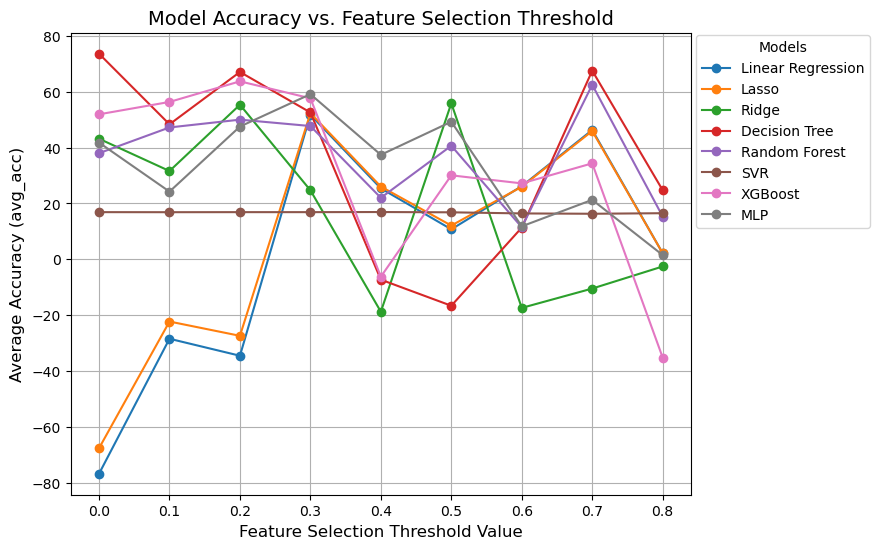

In [34]:
plt.figure(figsize=(8, 6))

# Iterate over models
for model_name, thresholds in model_accuracy_results.items():
    # Extract x (threshold values) and y (average accuracy)
    #print(thresholds.keys())
    x = list(thresholds.keys())
    y = [metrics["avg_acc"] for metrics in thresholds.values()]
    
    # Plot the line for the current model
    plt.plot(x, y, marker='o', label=model_name)

# Add labels and legend
plt.xlabel('Feature Selection Threshold Value', fontsize=12)
plt.ylabel('Average Accuracy (avg_acc)', fontsize=12)
plt.title('Model Accuracy vs. Feature Selection Threshold', fontsize=14)
plt.legend(title="Models", loc='upper right', bbox_to_anchor=(1.3, 1.01))
plt.grid(True)

# Show the plot
plt.show()

### <b>(D) <u>Result And Chart</u></b>

In [36]:
# setup Display function for table and chart, also export the result csv
import statistics
import ipywidgets as widgets
from ipywidgets import HBox, Output
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

def displayResultAccuracyTableAndChart(df_with_date, y_predict, y_test, avg_acc, min_acc, model_name):
    header = f"### {model_name}"

    date_list = df_with_date.iloc[-12:,0].values.tolist()
    y_test_list = y_test.values.tolist()
    y_predict_list = y_predict.tolist()
    accuracy_list = [round(accuracy(y_test_list[i], y_predict_list[i]), 2) for i in range(12)]

    #average_accuracy = round(statistics.mean(accuracy_list), 2)
    #min_accuracy = round(min(accuracy_list), 2)

    # table_md = "|| | ||\n"
    # table_md += "|-|-|-|-|\n"
    # table_md += f"|||average accuracy|{average_accuracy}|\n"
    # table_md += f"|||min. accuracy|{min_accuracy}|\n"
    # table_md += "<br>"

    data = {
        'date' : date_list,
        'actual value' : y_test_list,
        'predict value' : y_predict_list,
        'accuracy %' : accuracy_list
    }

    df = pd.DataFrame(data)
    df['actual value'] = df['actual value'].map(lambda x: f"{x:.2f}")
    df['predict value'] = df['predict value'].map(lambda x: f"{x:.2f}")
    df['accuracy %'] = df['accuracy %'].map(lambda x: f"{x:.2f}")
    
    # df.style.format({
    #     'actual value' : '{:.2f}',
    #     'predict value' : '{:.2f}',
    #     'accuracy %' : '{:.2f}',
    # })
    
    additional_rows = pd.DataFrame({
        'date': ['', ''],
        'actual value': ['', ''],
        'predict value': ['average accuracy', 'min. accuracy'],
        'accuracy %': [avg_acc, min_acc]
    })
    df = pd.concat([df, additional_rows], ignore_index=True)

    export_csv(df, model_name)

    data_id = [i+1 for i in range(12)]

    # Convert fig to a widget
    fig_output = Output()
    with fig_output:
        fig, ax = plt.subplots(figsize=(10, 5))
        bars = ax.bar(data_id, accuracy_list, color='lightblue', alpha=0.5)
        ax.bar_label(bars, fmt='%.2f')
        ax.set_ylabel('accuracy %')

        ax2 = ax.twinx()
        ax2.plot(data_id, y_test_list, label='actual value', marker='o', color='orange', markersize=4, linewidth=2)
        ax2.plot(data_id, y_predict_list, label='predict value', marker='x', color='blue', linestyle='-', markersize=4, linewidth=2)
        ax2.set_xticks(data_id)       # Set x-ticks to be at positions 1 to 12
        ax2.set_xticklabels(data_id)  # Set the labels to be the indices 1 to 12
        ax2.set_xlabel('date index')
        ax2.set_ylabel('value')
        
        plt.title(f"Test Data Actual and Predict Value ({model_name})")
        ax2.legend(loc='upper right', bbox_to_anchor=(1, 1.2))
        
        plt.tight_layout()
        plt.show()
        
    # Convert table to a widget
    table_output = Output()
    with table_output:
        display(Markdown(header))
        # display with H Box
        # display(df.style.format({
        #             'actual value' : '{:.2f}',
        #             'predict value' : '{:.2f}',
        #             'accuracy %' : '{:.2f}',
        #         }), display_id=True)
        display(df, display_id=False)
        #display(Markdown(table_md))

    table_output.layout.margin = '0 60px 0 0'  # Add right margin to the table

    # Display both the table and chart side by side
    #display(Markdown(header))
    hbox = HBox([table_output, fig_output])
    display(hbox)

In [37]:
display(Markdown("### All Models (Default Configuration) Best Result with corresponding feature threshold selection Summary"))
display(Markdown(model_result_table_md))

### All Models (Default Configuration) Best Result with corresponding feature threshold selection Summary

|model|feature threshold|MAE|RMSE|R2|Avg Accuracy(%)|Min Accuracy(%)|
|-|-|-|-|-|-|-|
|Linear Regression|0.30|3842.4363|4916.5123|-0.9987|51.75|-174.97
|Lasso|0.30|3733.0733|4867.4229|-0.9590|52.31|-177.60
|Ridge|0.50|3057.8517|4622.9971|-0.7672|55.84|-180.25
|Decision Tree|0.00|2653.2313|3095.5134|0.2077|73.58|27.72
|Random Forest|0.70|2579.3228|3864.4314|-0.2348|62.47|-119.36
|SVR|0.40|6998.1725|7813.8993|-4.0486|16.94|-234.25
|XGBoost|0.20|3476.2494|4440.0437|-0.6301|63.70|-29.59
|MLP|0.30|2666.1466|4337.6700|-0.5558|59.10|-169.32


In [38]:
for model_name, thresold_obj in model_accuracy_results.items():
    for threshold_val, metrics in thresold_obj.items():
        if (threshold_val == model_best_accuracy_feature_threshold[model_name]):
            displayResultAccuracyTableAndChart(dataset[dataset_name_with_date],
                                               metrics['y_pred'],
                                               metrics['y_test'],
                                               metrics['avg_acc'],
                                               metrics['min_acc'],
                                               f'{model_name}_(default_cfg)_(feature_threshold-{threshold_val})')

---

### <b>(2) <u>Performance Improvement</u></b> 
### The Next Step is to do the evaluation to find the best configuration of each model to the dataset
<br>

In [41]:
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV, RandomizedSearchCV

In [42]:
# base on the positive result from default configuration to add some variation for hyperparameters searching
models_params_cfg = {
    "Linear Regression" : {
                                'fit_intercept': [True, False],  # Whether to calculate the intercept
                                'positive': [False],             # Enforce positivity of coefficients
                                'copy_X': [True, False]          # Whether to copy X before fitting
                          },

                "Lasso" : {
                                'alpha': np.logspace(-4, 4, 10),  # from 0.0001 to 10000, #[0.005, 0.02, 0.03, 0.05, 0.06] # Regularization strength
                                'copy_X': [True],
                                'fit_intercept': [True],
                                'positive': [False],
                                'precompute': [False],
                                'selection': ['cyclic'],
                                'max_iter': [1000, 5000, 10000],  # Max number of iterations
                                'tol': [1e-4, 1e-3, 1e-2],        # Tolerance for stopping criteria
                                'warm_start': [False]
                          },

                "Ridge" :{
                                'alpha': np.logspace(-4, 4, 10),  # from 0.0001 to 10000 #[0.1, 1, 10, 100, 1000] # Regularization strength
                                'copy_X': [True],
                                'fit_intercept': [True],
                                'positive': [False],
                                'solver': ['auto'],
                                'max_iter': [1000, 5000, 10000, None],  # Max number of iterations
                                'tol': [1e-4, 1e-3, 1e-2],        # Tolerance for stopping criteria
                         },

         "Decision Tree": {
                                'criterion': ['squared_error'],                  # ['squared_error', 'friedman_mse', 'poisson']
                                'splitter': ['best'],
                                'max_depth': [5, 10, 15, None],                  # Depth of the tree
                                'min_samples_split': [2, 5, 10],                 # Minimum samples to split a node
                                'min_samples_leaf': [1, 2, 4],                   # Minimum samples to be a leaf node
                                'min_weight_fraction_leaf': [0.0, 0.1],          # Weighted fraction of samples
                                'max_features': [None],                          # Features to consider for splits
                                'monotonic_cst': [None],
                                #'random_state': [42],
                                'max_leaf_nodes': [None, 10, 50],                # Max number of leaf nodes
                                'min_impurity_decrease': [0.0, 0.1, 0.2],        # Minimum impurity decrease to split
                                'ccp_alpha': [0.0, 0.01, 0.1]                    # Complexity parameter for pruning
                          },

        "Random Forest" : {
                                'n_estimators': np.logspace(1, 3, 3).astype(int),  # From 10 to 1000
                                'max_depth': [None, 10, 20],                       # Max depth options [None, 10, 20, 30]
                                'criterion': ['squared_error'],                    # ['squared_error', 'absolute_error']
                                'min_samples_split': [2, 5, 10],                   # Minimum samples to split a node
                                'min_samples_leaf': [1, 2, 4],                     # Minimum samples to be a leaf node
                                #'min_weight_fraction_leaf': [0.0, 0.1],            # Weighted fraction of samples
                                'ccp_alpha': [0.0, 0.01]                           # Complexity parameter for pruning [0.0, 0.01, 0.1]
                          },

                  "SVR" : {
                                'C': [1, 10],                             # Regularization parameter, [1, 10, 100, 1000]
                                'epsilon': [0.1, 0.5],                    # Epsilon for regression error [0.1, 0.2, 0.5, 1.0]
                                'gamma': ['scale', 0.1],                   # Kernel coefficient ['scale', 'auto', 0.1, 0.5]
                                'kernel': ['linear', 'rbf'],               # Kernel type ['linear', 'rbf', 'poly']
                                'degree': [3],                             # Degree of polynomial kernel [3, 4, 5]
                                'shrinking': [True],                       # Whether to use the shrinking heuristic [True, False]
                                'cache_size': [200],                       # Size of the kernel cache (MB) [200, 500, 1000]
                                'max_iter': [-1]                           # Maximum iterations [-1, 1000, 5000]
                          },

                "XGBoost" : {
                                'objective': ['reg:squarederror'],
                                'enable_categorical': [False],
                                'n_estimators': [100, 200],                        # Number of boosting rounds [100, 200, 500]
                                'learning_rate': [0.01, 0.1, 0.2],                  # Learning rate (step size) [0.01, 0.1, 0.2]
                                'max_depth': [None],                               # Max depth of tree [3, 6, 9]
                                'min_child_weight': [None],                      # Min child weight
                                'subsample': [0.8, 0.9, 1.0],                          # Fraction of samples for each tree [0.8, 0.9, 1.0]
                                'colsample_bytree': [0.8, 0.9],                    # Fraction of features for each tree [0.8, 0.9, 1.0]
                                'gamma': [None],                               # Minimum loss reduction for pruning
                                'lambda': [None],                               # L2 regularization
                                'alpha': [None],                               # L1 regularization
                                'booster': [None],                              # Type of boosting model ['gbtree', 'dart']
                            },

                    "MLP" : {
                                'hidden_layer_sizes': [(50,), (100,), (100, 50), (200, 100), (200, 100, 50)],    # Number of neurons in each hidden layer [(50,), (100,), (100, 50), (200, 100)]
                                'activation': ['relu'],                              # Activation function for hidden layers ['relu', 'tanh', 'logistic']
                                'solver': ['adam'],                                     # Solver for optimization ['adam', 'sgd', 'lbfgs']
                                'alpha': [0.0001, 0.001, 0.01],                                  # Regularization strength
                                'beta_1': [0.9],
                                'beta_2': [0.999],
                                'learning_rate': ['constant'],                               # Learning rate schedule 'constant' 'invscaling', 'adaptive'
                                'learning_rate_init': [0.001, 0.01, 0.1],                        # Initial learning rate
                                'max_iter': [30000],                                              # Maximum number of iterations
                                'batch_size': ['auto'],                                          # Minibatch size (only for 'sgd' or 'adam') [32, 64, 128]
                                'early_stopping': [False],                                 # Early stopping on validation score
                                #'momentum': [0.8, 0.9, 0.95],                                          # Momentum for 'sgd' solver [0.9, 0.95, 0.99]
                                'n_iter_no_change': [10]                                     # Number of iterations with no improvement before stopping
                            }
}

In [43]:
# Initialize TimeSeriesSplit with 5 splits
grid_search_model_obj = {}

threshold_to_data_list_map = {0: 0,
                          0.1: 1,
                          0.2: 2,
                          0.3: 3,
                          0.4: 4,
                          0.5: 5,
                          0.6: 6,
                          0.7: 7,
                          0.8: 8}

# Initialize the model again
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(random_state=42),
    "Ridge": Ridge(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "SVR": SVR(),
    "XGBoost": XGBRegressor(objective="reg:squarederror", random_state=42),
    "MLP": MLPRegressor(max_iter=30000, random_state=42)
}

#model_best_accuracy_feature_threshold

# Initialize the result
model_accuracy_results_best_cfg = {}

model_result_best_cfg_table_md = "|model|feature threshold|MAE|RMSE|R2|Avg Accuracy(%)|Min Accuracy(%)|\n"
model_result_best_cfg_table_md += "|-|-|-|-|-|-|-|\n"

# there are three scoring methods
scoring_method = 'neg_mean_squared_error' # neg_mean_squared_error, neg_mean_absolute_error, r2

for model_name, model in models.items():

    threshold_val = model_best_accuracy_feature_threshold[model_name]

    data_index = threshold_to_data_list_map[threshold_val]

    timeseries_cv = TimeSeriesSplit(n_splits=5)
    
    # grid_search_model_obj[model_name] = RandomizedSearchCV(estimator=model, param_distributions=models_params_cfg[model_name], cv=timeseries_cv, scoring=scoring_method,
    #                                                   random_state=42,
    #                                                   n_iter=8,
    #                                                   n_jobs=-1, # use all CPU to work
    #                                                   verbose=1) # display progress

    grid_search_model_obj[model_name] = GridSearchCV(estimator=model, param_grid=models_params_cfg[model_name], cv=timeseries_cv, scoring=scoring_method,
                                                      n_jobs=-1, # use all CPU to work
                                                      verbose=0) # display progress
    
    # Fit the GridSearchCV by training set (use training set to split for evaluation)
    grid_search_model_obj[model_name].fit(Xs_train[data_index], y_train)

    # Best parameters and best score
    display(Markdown(f"### {model_name}_Best_Configuration_Result_(feature threshold = {threshold_val})"))
    print(f"{model_name}, Best Parameters:", grid_search_model_obj[model_name].best_params_)
    print(f"{model_name}, Best Score:", grid_search_model_obj[model_name].best_score_)
    print("---------------------------------------------------------------------------\n")

    # Test the result
    best_configured_model = grid_search_model_obj[model_name].best_estimator_
    y_pred = best_configured_model.predict(Xs_test[data_index])
    
    # Calculate the performance
    mae, rmse, r2, avg_acc, min_acc = calculate_performance(y_test, y_pred)

    if (model_name not in model_accuracy_results_best_cfg):
        model_accuracy_results_best_cfg[model_name] = {}
    model_accuracy_results_best_cfg[model_name][threshold_val] = {
        "MAE": mae,
        "RMSE": rmse,
        "R2" : r2,
        "y_pred" : y_pred,
        "y_test" : y_test,
        "avg_acc": avg_acc,
        "min_acc" : min_acc}
    
    model_result_best_cfg_table_md += f"|{model_name}|{threshold_val:.2f}|{mae:.4f}|{rmse:.4f}|{r2:.4f}|{avg_acc:.2f}|{min_acc:.2f}\n"


### Linear Regression_Best_Configuration_Result_(feature threshold = 0.3)

Linear Regression, Best Parameters: {'copy_X': True, 'fit_intercept': True, 'positive': False}
Linear Regression, Best Score: -1928588090.625399
---------------------------------------------------------------------------



### Lasso_Best_Configuration_Result_(feature threshold = 0.3)

Lasso, Best Parameters: {'alpha': 166.81005372000558, 'copy_X': True, 'fit_intercept': True, 'max_iter': 1000, 'positive': False, 'precompute': False, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False}
Lasso, Best Score: -316844325.4687249
---------------------------------------------------------------------------



### Ridge_Best_Configuration_Result_(feature threshold = 0.5)

Ridge, Best Parameters: {'alpha': 0.3593813663804626, 'copy_X': True, 'fit_intercept': True, 'max_iter': 1000, 'positive': False, 'solver': 'auto', 'tol': 0.0001}
Ridge, Best Score: -256953167.1958278
---------------------------------------------------------------------------



### Decision Tree_Best_Configuration_Result_(feature threshold = 0)

Decision Tree, Best Parameters: {'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 4, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'splitter': 'best'}
Decision Tree, Best Score: -387209813.0820225
---------------------------------------------------------------------------



### Random Forest_Best_Configuration_Result_(feature threshold = 0.7)

Random Forest, Best Parameters: {'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 10}
Random Forest, Best Score: -399051862.81588984
---------------------------------------------------------------------------



### SVR_Best_Configuration_Result_(feature threshold = 0.4)

SVR, Best Parameters: {'C': 10, 'cache_size': 200, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'shrinking': True}
SVR, Best Score: -757563661.9450531
---------------------------------------------------------------------------



### XGBoost_Best_Configuration_Result_(feature threshold = 0.2)

XGBoost, Best Parameters: {'alpha': None, 'booster': None, 'colsample_bytree': 0.9, 'enable_categorical': False, 'gamma': None, 'lambda': None, 'learning_rate': 0.2, 'max_depth': None, 'min_child_weight': None, 'n_estimators': 100, 'objective': 'reg:squarederror', 'subsample': 0.8}
XGBoost, Best Score: -298831314.4131478
---------------------------------------------------------------------------



C:\Users\demon\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30000) reached and the optimization hasn't converged yet.
  warnings.warn(


### MLP_Best_Configuration_Result_(feature threshold = 0.3)

MLP, Best Parameters: {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_iter': 30000, 'n_iter_no_change': 10, 'solver': 'adam'}
MLP, Best Score: -343996346.9391977
---------------------------------------------------------------------------



In [44]:
display(Markdown("### All Models (Best Configuration) Result with corresponding feature threshold selection Summary"))
display(Markdown(model_result_best_cfg_table_md))

### All Models (Best Configuration) Result with corresponding feature threshold selection Summary

|model|feature threshold|MAE|RMSE|R2|Avg Accuracy(%)|Min Accuracy(%)|
|-|-|-|-|-|-|-|
|Linear Regression|0.30|3842.4363|4916.5123|-0.9987|51.75|-174.97
|Lasso|0.30|3713.8042|4854.1753|-0.9483|50.76|-137.83
|Ridge|0.50|4643.7979|5063.6399|-1.1201|52.04|-76.53
|Decision Tree|0.00|2620.1836|3815.0941|-0.2035|63.16|-109.20
|Random Forest|0.70|5838.8463|7152.0924|-3.2296|25.71|-250.32
|SVR|0.40|6521.2063|7365.8822|-3.4863|21.81|-221.07
|XGBoost|0.20|4109.2188|4702.3165|-0.8283|56.10|-61.99
|MLP|0.30|11743.4922|12543.8239|-12.0105|-23.66|-296.16


In [45]:
for model_name, thresold_obj in model_accuracy_results_best_cfg.items():
    for threshold_val, metrics in thresold_obj.items():
        displayResultAccuracyTableAndChart(dataset[dataset_name_with_date],
                                           metrics['y_pred'],
                                           metrics['y_test'],
                                           metrics['avg_acc'],
                                           metrics['min_acc'],
                                           f'{model_name}_best_cfg_(feature_threshold-{threshold_val})')

In [46]:
default_cfg_table_output = Output()
tuned_cfg_table_output = Output()

with default_cfg_table_output:
    display(Markdown("### All Models (Default Configuration) Result Table Summary"))
    display(Markdown(model_result_table_md))

with tuned_cfg_table_output:
    display(Markdown("### All Models (Tuned Configuration) Result Table Summary"))
    display(Markdown(model_result_best_cfg_table_md))

hbox2 = HBox([default_cfg_table_output, tuned_cfg_table_output])
# display(Markdown(f"### Under selected features by correlation threshold {thresholds}"))
# feature_size = len(features_above_threshold)
# display(Markdown(f"### Features used (Size : {feature_size}) {features_above_threshold}"))
display(hbox2)

for model_name, model in models.items():
    display(Markdown(f"### {model_name}_Default_Configuration"))
    print(f"{model_name}, Default Parameters:", model.get_params())
    display(Markdown(f"### {model_name}_Tuned_Configuration"))
    print(f"{model_name}, Best Parameters:", grid_search_model_obj[model_name].best_params_)
    display(Markdown("---"))

### Linear Regression_Default_Configuration

Linear Regression, Default Parameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}


### Linear Regression_Tuned_Configuration

Linear Regression, Best Parameters: {'copy_X': True, 'fit_intercept': True, 'positive': False}


---

### Lasso_Default_Configuration

Lasso, Default Parameters: {'alpha': 1.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': 1000, 'positive': False, 'precompute': False, 'random_state': 42, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False}


### Lasso_Tuned_Configuration

Lasso, Best Parameters: {'alpha': 166.81005372000558, 'copy_X': True, 'fit_intercept': True, 'max_iter': 1000, 'positive': False, 'precompute': False, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False}


---

### Ridge_Default_Configuration

Ridge, Default Parameters: {'alpha': 1.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'positive': False, 'random_state': None, 'solver': 'auto', 'tol': 0.0001}


### Ridge_Tuned_Configuration

Ridge, Best Parameters: {'alpha': 0.3593813663804626, 'copy_X': True, 'fit_intercept': True, 'max_iter': 1000, 'positive': False, 'solver': 'auto', 'tol': 0.0001}


---

### Decision Tree_Default_Configuration

Decision Tree, Default Parameters: {'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 42, 'splitter': 'best'}


### Decision Tree_Tuned_Configuration

Decision Tree, Best Parameters: {'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 4, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'splitter': 'best'}


---

### Random Forest_Default_Configuration

Random Forest, Default Parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


### Random Forest_Tuned_Configuration

Random Forest, Best Parameters: {'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 10}


---

### SVR_Default_Configuration

SVR, Default Parameters: {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}


### SVR_Tuned_Configuration

SVR, Best Parameters: {'C': 10, 'cache_size': 200, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'shrinking': True}


---

### XGBoost_Default_Configuration

XGBoost, Default Parameters: {'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 42, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}


### XGBoost_Tuned_Configuration

XGBoost, Best Parameters: {'alpha': None, 'booster': None, 'colsample_bytree': 0.9, 'enable_categorical': False, 'gamma': None, 'lambda': None, 'learning_rate': 0.2, 'max_depth': None, 'min_child_weight': None, 'n_estimators': 100, 'objective': 'reg:squarederror', 'subsample': 0.8}


---

### MLP_Default_Configuration

MLP, Default Parameters: {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 30000, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 42, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


### MLP_Tuned_Configuration

MLP, Best Parameters: {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_iter': 30000, 'n_iter_no_change': 10, 'solver': 'adam'}


---